# Pembelajaran Mesin: Tugas Akhir Pra-UTS

- Nama: Faiz Unisa Jazadi
- NIM: 21/475298/PA/20563
- Kelas: KOMA

## Dataset

Digunakan data "Telco Customer Churn" dari Kaggle. Data berisi informasi customer pada suatu perusahaan telco. Tiap baris merepresentasikan customer dan tiap kolom merepresentasikan atribut customer. Dataset ditujukan untuk mengklasifikasikan churning atau terkait retensi customer. Dengan kata lain, dataset ditujukan untuk menjawab pertanyaan "Apakah customer akan lanjut berlangganan?".

<https://www.kaggle.com/datasets/blastchar/telco-customer-churn>

### Rencana

Karena dataset berisi data customer yang ditujukan untuk digunakan dalam menentukan churning, maka saya berencana menggunakan metode machine learning supervised. Secara spesifik, saya berencana menggunakan metode decision tree learning (DTL).

### Library dan Utilities

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading Dataset

In [11]:
df = pd.read_csv('dataset.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  7590-VHVEG  Female              0     Yes         No       1           No  \
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection   
0  No phone service             DSL             No  ...               No  \
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling   
0          No          No              No  Month-to-month              Yes  \
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## Data Preprocessing

Dataset yang dimuat tidak bisa langsung diproses. Beberapa kolom seperti `customerID` bertipe string yang unik dan tidak akan relevan untuk tugas ini sehingga akan di-drop.

In [12]:
df = df.drop(columns='customerID')

Kemudian, berdasarkan observasi nilai-nilai yang mungkin untuk setiap kolom dan didapat pengelompokan
berikut.

In [13]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
binary_columns = ['SeniorCitizen', 'Partner', 'Dependents',
                  'PhoneService', 'PaperlessBilling', 'Churn']


In [14]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Beberapa kolom yang seharusnya numerik tapi malah terbaca sebagai kategorikal (dan sebaliknya) juga harus diperbaiki dan disesuaikan.
Kolom-kolom yang bernilai biner (Ya atau Tidak) juga akan diubah menjadi integer.

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

for col_name in binary_columns:
    df[col_name] = df[col_name].map(lambda val: 1 if val == 'Yes' else 0)


Baris-baris yang mempunyai nilai `null` juga akan dihapus karena dinilai kurang relevan dan lengkap.

In [16]:
df = df.dropna()

## Decision Tree Learning

Akan digunakan bantuan library `sklearn` untuk membuat decision tree classifier.

### Persiapan Data

Sebelumnya, selain kolom-kolom yang dikelompokkan sebagai numerik dan biner, ada juga kolom yang bersifat kategorikal. Agar mudah diproses, suatu kolom kategorikal akan dipecah menjadi kolom-kolom dummy sebanyak nilai yang mungkin untuk kolom kategorikal tersebut.

In [31]:
df_dummy = pd.get_dummies(df)
for c in df_dummy.columns:
    print(c, end=', ')


SeniorCitizen, Partner, Dependents, tenure, PhoneService, PaperlessBilling, MonthlyCharges, TotalCharges, Churn, gender_Female, gender_Male, MultipleLines_No, MultipleLines_No phone service, MultipleLines_Yes, InternetService_DSL, InternetService_Fiber optic, InternetService_No, OnlineSecurity_No, OnlineSecurity_No internet service, OnlineSecurity_Yes, OnlineBackup_No, OnlineBackup_No internet service, OnlineBackup_Yes, DeviceProtection_No, DeviceProtection_No internet service, DeviceProtection_Yes, TechSupport_No, TechSupport_No internet service, TechSupport_Yes, StreamingTV_No, StreamingTV_No internet service, StreamingTV_Yes, StreamingMovies_No, StreamingMovies_No internet service, StreamingMovies_Yes, Contract_Month-to-month, Contract_One year, Contract_Two year, PaymentMethod_Bank transfer (automatic), PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check, 

### Pemisahan Data Train dan Test

Data training dan testing dipisah dengan rasio 4:1 (25% data testing).

In [18]:
from sklearn.model_selection import train_test_split

feature_cols = [c for c in df_dummy.columns if c != 'Churn']
X = df_dummy[feature_cols]
y = df_dummy['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=16)

### Training Data

In [99]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)
initial_depth = clf.tree_.max_depth

best_model = clf
model_score = clf.score(X_test, y_test)
for max_depth in range(2, initial_depth):
    clf = tree.DecisionTreeClassifier(criterion='gini',
                                      max_depth=max_depth)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if score > model_score:
        model_score = score
        best_model = clf

### Visualisasi Decision Tree

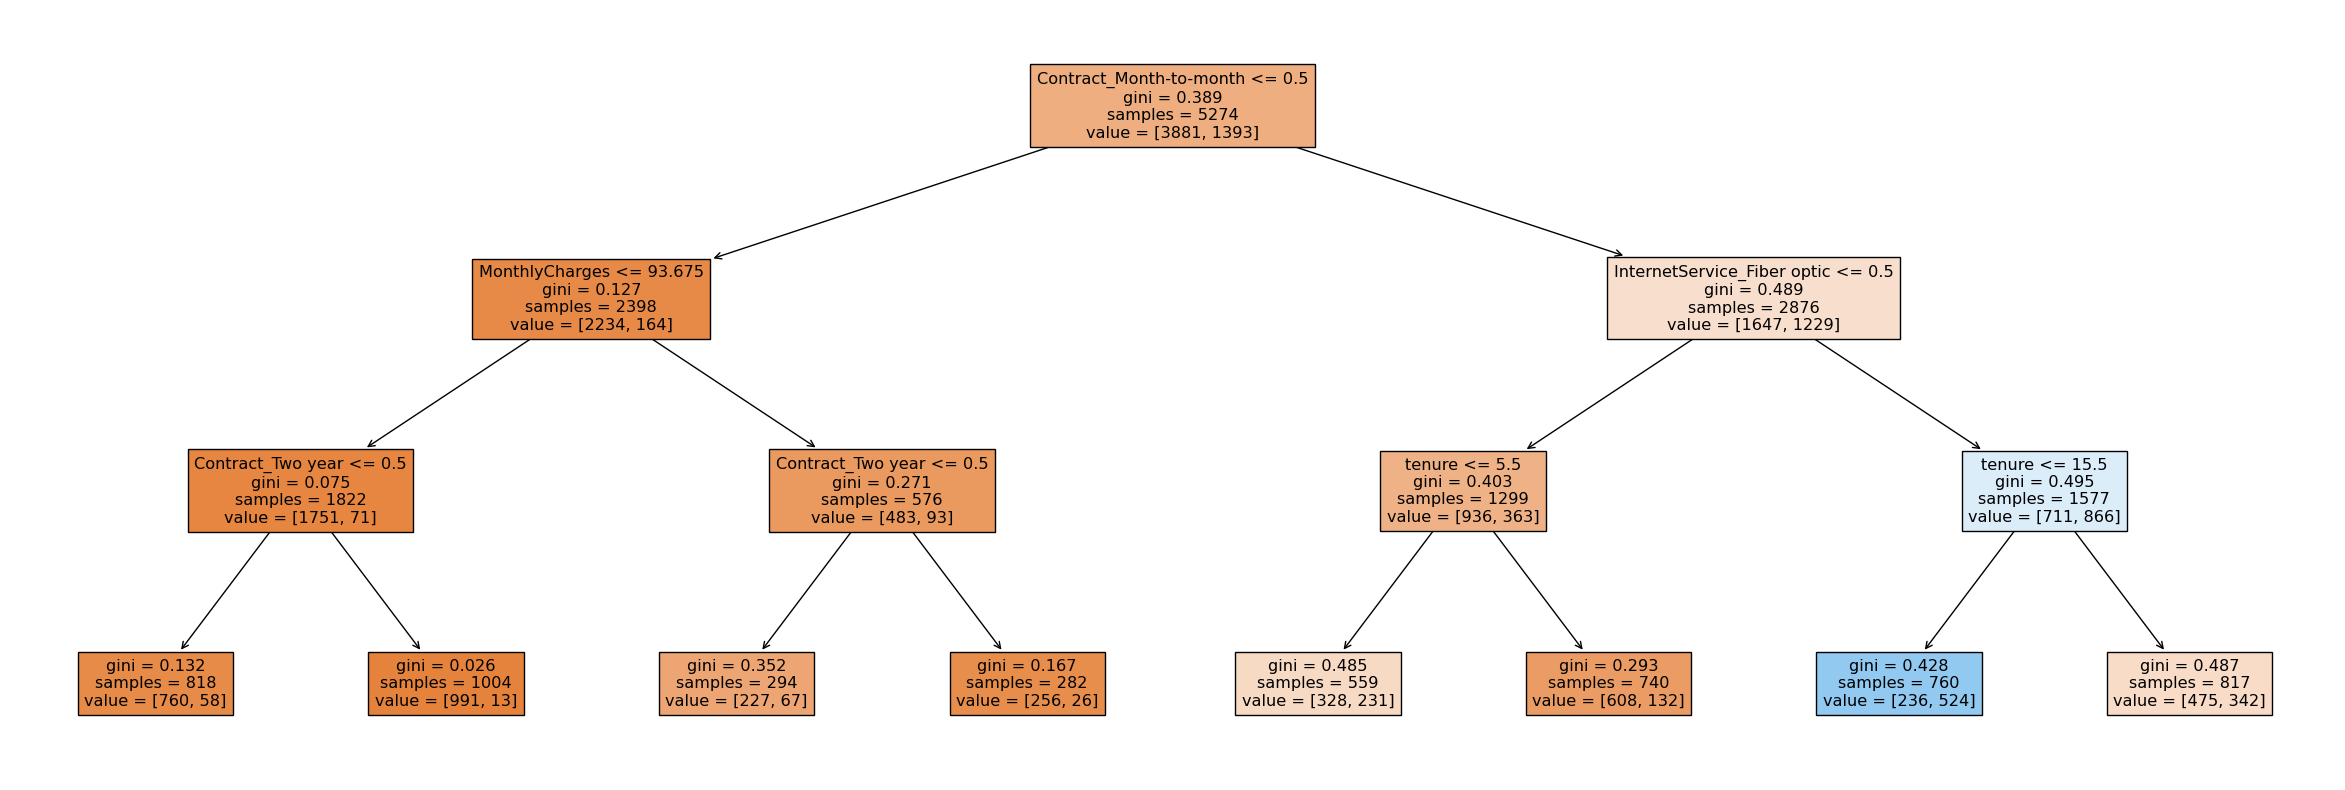

In [109]:
plt.figure(figsize=(30, 10))
tree.plot_tree(best_model, filled=True,
               feature_names=X_train.columns);

### Evaluasi

In [101]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1282
           1       0.70      0.41      0.51       476

    accuracy                           0.79      1758
   macro avg       0.75      0.67      0.69      1758
weighted avg       0.78      0.79      0.77      1758

